In [61]:
import pandas as pd
import numpy as np
import random
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [28]:
df = pd.read_csv("loan_data_exam.csv")

In [29]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,40997,35.0,female,High School,157123.0,9,MORTGAGE,6657.0,HOMEIMPROVEMENT,17.37,0.04,5.0,659.0,Yes,0.0
1,44208,26.0,male,Master,42906.0,3,RENT,12958.0,MEDICAL,11.59,0.30,3.0,645.0,No,1.0
2,9915,22.0,NaN,Associate,58958.0,3,RENT,9000.0,DEBTCONSOLIDATION,7.88,0.15,2.0,652.0,Yes,0.0
3,17597,22.0,male,High School,82024.0,0,RENT,7500.0,VENTURE,9.76,0.09,3.0,566.0,Yes,0.0
4,21842,31.0,female,Master,78532.0,8,RENT,6000.0,VENTURE,6.99,0.08,10.0,703.0,No,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      10000 non-null  int64  
 1   person_age                      8991 non-null   float64
 2   person_gender                   9184 non-null   object 
 3   person_education                9091 non-null   object 
 4   person_income                   10000 non-null  float64
 5   person_emp_exp                  10000 non-null  int64  
 6   person_home_ownership           10000 non-null  object 
 7   loan_amnt                       9553 non-null   float64
 8   loan_intent                     10000 non-null  object 
 9   loan_int_rate                   10000 non-null  float64
 10  loan_percent_income             10000 non-null  float64
 11  cb_person_cred_hist_length      10000 non-null  float64
 12  credit_score                    8

In [31]:
df.isna().sum()

Unnamed: 0                           0
person_age                        1009
person_gender                      816
person_education                   909
person_income                        0
person_emp_exp                       0
person_home_ownership                0
loan_amnt                          447
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                      1042
previous_loan_defaults_on_file       0
loan_status                        837
dtype: int64

In [32]:
df.drop(columns="Unnamed: 0", inplace=True)

In [33]:
label_encoder = LabelEncoder()
df["person_gender"] = label_encoder.fit_transform(df["person_gender"])
label_encoder.classes_

array(['female', 'male', nan], dtype=object)

In [34]:
df["person_gender"] = df["person_gender"].replace(2, np.nan)

In [35]:
df["person_gender"].unique()

array([ 0.,  1., nan])

In [36]:
df["person_gender"].isna().sum()

np.int64(816)

In [37]:
knn_imputer = KNNImputer(n_neighbors=23)
df["person_gender"] = knn_imputer.fit_transform(df[["person_gender"]])
df["person_gender"].isna().sum()

np.int64(0)

In [38]:
df["person_education"].unique()

array(['High School', 'Master', 'Associate', 'Bachelor', nan, 'Doctorate'],
      dtype=object)

In [39]:
values = ["High School", "Bachelor", "Associate", "Master", "Doctorate", np.nan] 
ordinal_encoder = OrdinalEncoder(categories=[values])
encoded_values = ordinal_encoder.fit_transform(df[["person_education"]])
df["person_education"] = encoded_values

In [40]:
df["person_education"].isna().sum()

np.int64(909)

In [41]:
knn_imputer = KNNImputer(n_neighbors=31)
df["person_education"] = knn_imputer.fit_transform(df[["person_education"]])
df["person_education"].isna().sum()

np.int64(0)

In [42]:
df["person_home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [43]:
one_hot_encoded_values = pd.get_dummies(df["person_home_ownership"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="person_home_ownership", inplace=True)

In [45]:
df["loan_intent"].unique()

array(['HOMEIMPROVEMENT', 'MEDICAL', 'DEBTCONSOLIDATION', 'VENTURE',
       'EDUCATION', 'PERSONAL'], dtype=object)

In [47]:
label_encoder = LabelEncoder()
df["loan_intent"] = label_encoder.fit_transform(df["loan_intent"])

In [48]:
label_encoder = LabelEncoder()
df["previous_loan_defaults_on_file"] = label_encoder.fit_transform(df["previous_loan_defaults_on_file"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      8991 non-null   float64
 1   person_gender                   10000 non-null  float64
 2   person_education                10000 non-null  float64
 3   person_income                   10000 non-null  float64
 4   person_emp_exp                  10000 non-null  int64  
 5   loan_amnt                       9553 non-null   float64
 6   loan_intent                     10000 non-null  int64  
 7   loan_int_rate                   10000 non-null  float64
 8   loan_percent_income             10000 non-null  float64
 9   cb_person_cred_hist_length      10000 non-null  float64
 10  credit_score                    8958 non-null   float64
 11  previous_loan_defaults_on_file  10000 non-null  int64  
 12  loan_status                     9

<Axes: >

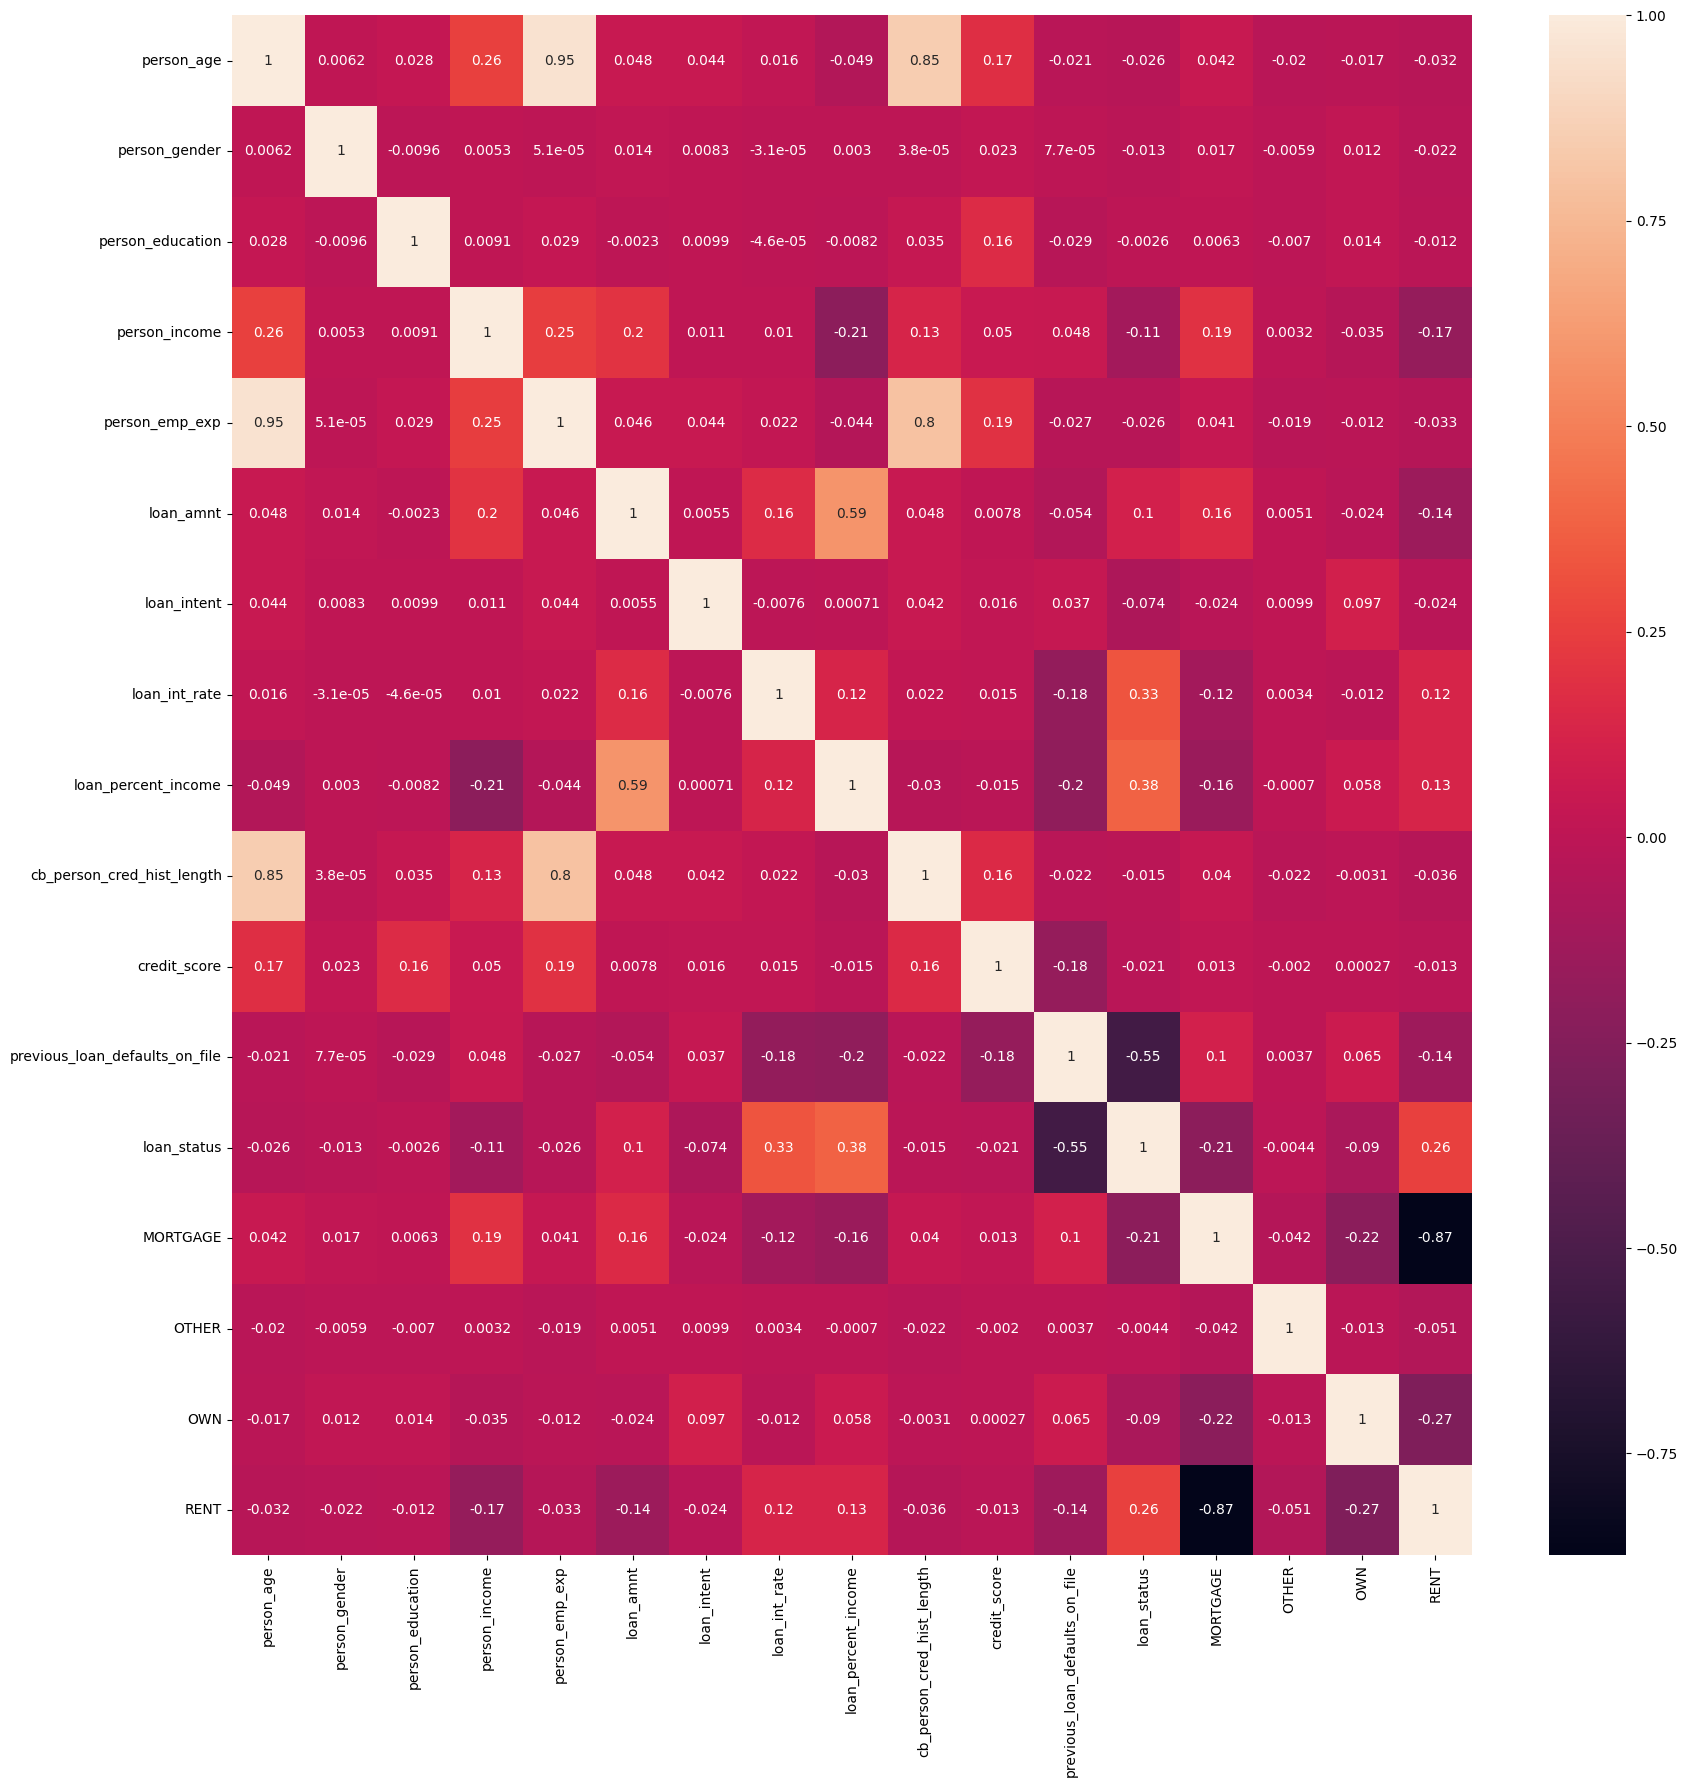

In [54]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [57]:
df.isna().sum()

person_age                        1009
person_gender                        0
person_education                     0
person_income                        0
person_emp_exp                       0
loan_amnt                          447
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                      1042
previous_loan_defaults_on_file       0
loan_status                        837
MORTGAGE                             0
OTHER                                0
OWN                                  0
RENT                                 0
dtype: int64

<Axes: >

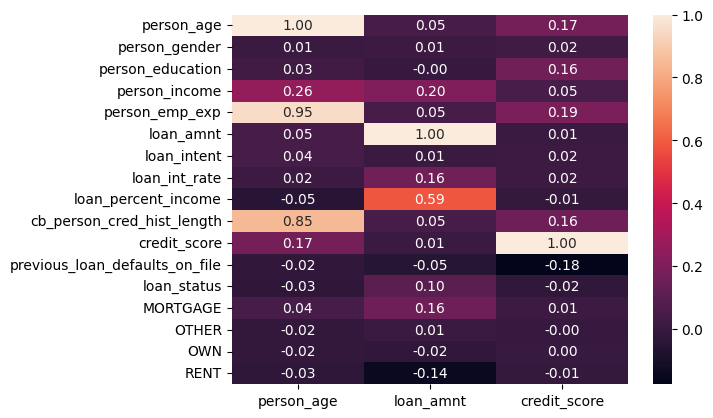

In [59]:
sns.heatmap(df.corr(numeric_only=True)[["person_age", "loan_amnt", "credit_score"]], annot=True, fmt=".2f")

In [62]:
iterative_imputer = IterativeImputer()
imputed_data = iterative_imputer.fit_transform(df[["person_age", "person_emp_exp", "cb_person_cred_hist_length"]])
df[["person_age", "person_emp_exp", "cb_person_cred_hist_length"]] = imputed_data
df["person_age"].isna().sum()

np.int64(0)

In [63]:
iterative_imputer = IterativeImputer()
imputed_data = iterative_imputer.fit_transform(df[["loan_amnt", "loan_percent_income"]])
df[["loan_amnt", "loan_percent_income"]] = imputed_data
df["loan_amnt"].isna().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

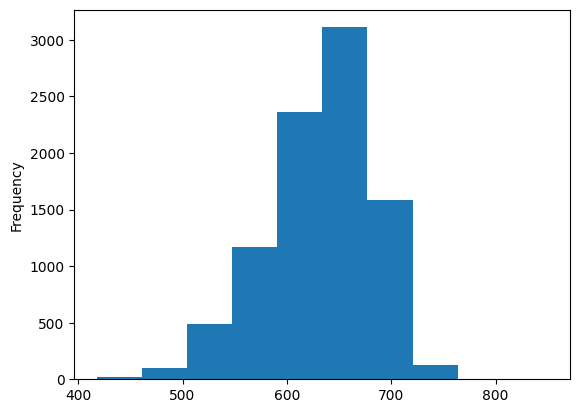

In [64]:
df["credit_score"].plot.hist()

In [65]:
imputer = SimpleImputer(strategy="median")
df[["credit_score"]] = imputer.fit_transform(df[["credit_score"]])
df["credit_score"].isna().sum()

np.int64(0)

In [66]:
df.isna().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       837
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
dtype: int64

In [67]:
df = df.dropna(subset=["loan_status"], axis=0)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9163 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      9163 non-null   float64
 1   person_gender                   9163 non-null   float64
 2   person_education                9163 non-null   float64
 3   person_income                   9163 non-null   float64
 4   person_emp_exp                  9163 non-null   float64
 5   loan_amnt                       9163 non-null   float64
 6   loan_intent                     9163 non-null   int64  
 7   loan_int_rate                   9163 non-null   float64
 8   loan_percent_income             9163 non-null   float64
 9   cb_person_cred_hist_length      9163 non-null   float64
 10  credit_score                    9163 non-null   float64
 11  previous_loan_defaults_on_file  9163 non-null   int64  
 12  loan_status                     9163 no

In [70]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred)) 

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

C:\Users\anama\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [14:55:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9274413529732679
[[1364   43]
 [  90  336]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1407
         1.0       0.89      0.79      0.83       426

    accuracy                           0.93      1833
   macro avg       0.91      0.88      0.89      1833
weighted avg       0.93      0.93      0.93      1833

